# 3次元点集合データ(ポイントクラウド)の解析

この文章で解説するのは

1. 3次元の点データからパーシステント図を計算する
2. その図をパラメータを変えながら可視化する
3. テキストデータにbirth-death pairを出力する
4. 基本的な逆解析(birth simplex, death simplexの出力)を行う

の4つです。ここまではおよそどのようなポイントクラウドデータでも
共通ですので、ここまでできるようになると良いでしょう。


## パーシステント図の計算 


対称となるデータは `pointcloud.txt` というファイルです。これは
3次元標準正規分布に従うランダムな点を
5000個撒き散らしたものです。これを解析してみましょう。

まずこれを表示します。最初の10行を見てみましょう

In [1]:
head pointcloud.txt

-1.688604987600753837e+00 5.699006029198190326e-01 -1.346186823505619579e+00
1.087144905453914845e+00 1.934202933045750861e+00 8.273916713882594198e-01
-1.157236831361657392e-01 -1.168206946858528328e+00 -3.994263428990901810e-01
-1.602174172538033403e-01 -8.626762802439005284e-01 1.188676117430170320e+00
5.613694793886953027e-02 -8.925811823166075465e-01 7.867005084945112303e-01
-3.121247358971382946e-01 -2.982206113960411131e-01 1.317235943833295453e+00
9.831752257585583132e-01 -2.465116319438791059e+00 -6.081245384492277584e-01
-7.600677459838747207e-01 -6.142993053684995264e-01 3.828101574633524518e-01
3.666431208906655304e-01 -4.606251408481700227e-01 1.759186989342665930e+00
3.009754635114507137e-01 5.049945721030327794e-01 1.429650286762043088e+00


このようにデータが3列で並んでいます

データからパーシステント図を計算します。 `python3 -m homcloud.pc_alpha` というコマンドを使います。
利便性のため、`homcloud-pc-alpha`というコマンドもあり、これも同じ動作をします。

In [2]:
python3 -m homcloud.pc_alpha -d 3 -I -D pointcloud.txt pointcloud.idiagram

とします。すると pointcloud.idiagram というファイルが生成されます。これが
パーシステント図の情報を収めたファイルです。`-d 3`というのが入力データの次元
(ここでは3)で、`pointcloud.txt` で入力データを、`pointcloud.idiagram`で出力データを
指定します。`-I`, `-D`というのはHomCloudの便利機能を有効にするもので常に指定しておくと
良いです。


### パーシステント図の可視化

次に、ここからパーシステント図をプロットしてみましょう。



In [3]:
python3 -m homcloud.plot_PD -d 1 pointcloud.idiagram -o pointcloud-pd1.png

とします。ここで`-d 1`というのは1次のパーシステント図(つまりリングの情報)を
可視化することを意味します。`-d 2`とすると1次のパーシステント図(つまり空隙の情報)を
可視化します。`-o pointcloud-pd1.png`は画像を出力先のファイル名を指定します。すると以下のような画像が出力されます。

ここで使っている display は jupyter notebookでbashを使うときに画像を表示するためのインターフェースです。
jupyter notebookと組み合わせると便利なのでこのチュートリアルでは使っていきます。

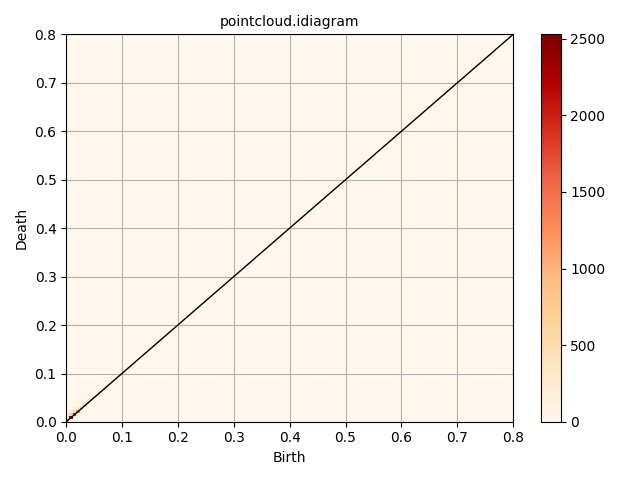

In [4]:
display < pointcloud-pd1.png

左下のほうに何かちょっと見えてあとは何も見えません。というのは
このデータは左下のほうにデータ(birth-death pair)が偏っているからです。
そこで色付けを log scale にしましょう。`-l` オプションを使います。あとX軸とY軸のスケールが違うのはかっこ悪いのでそれも直します。
こちらは `--aspect equal` です。

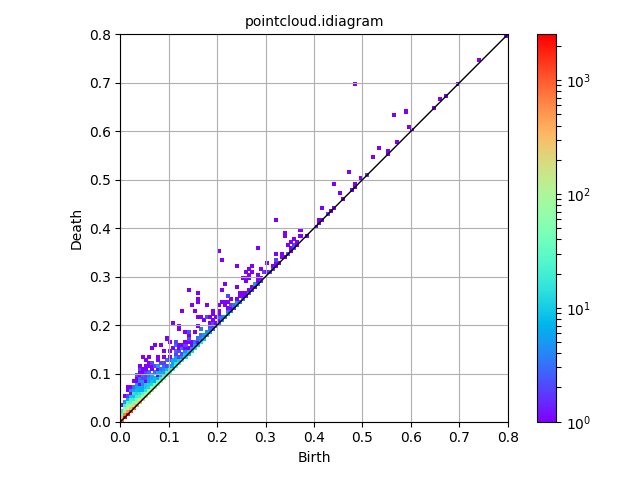

In [6]:
python3 -m homcloud.plot_PD -d 1 -l --aspect equal pointcloud.idiagram -o pointcloud-pd1-log.png
display < pointcloud-pd1-log.png

基本的にはパーシステント図の点は対角線から離れるほど「意味のある」リング構造と対応し、
またY軸が大きい値になるほど大きなリング構造を表しています。
つまり(0.5, 0.7)のあたりにある点がこのランダムな点がなすリング構造のなかで最も
ちゃんとしたリング構造を持っているものと対応していると言えそうです。

ここで注意しておくと、パーシステント図のX、Y軸は点に貼り付ける球の半径と対応していると
よくある教科書には書かれています。HomCloudでは実はこれは半径の2乗が使われています。
つまり√0.5≒0.7と√0.7≒0.84が実際の半径になります。これは主には内部のアルゴリズムの都合に
よるものですが、各点に重みづけをしたときにはこのほうが自然に見えるという事情もあり、
HomCloudでは2乗の値が使われます。これを止めたいときはパーシステント図を
`homcloud.pc_alpha` で計算するときに `--no-square` オプションを付けると
半径パラメータそのものがX、Y軸に現れます。


さて、次にbirth-death pairが集中している
左下の 0.0〜0.1 のあたりを拡大して調べてみましょう。デフォルトでは
すべてのbirth-death pairが含まれるような範囲でプロットするので、これを変更します。
このときは以下のようなコマンドを使います。`-x`オプションで範囲を指定します。

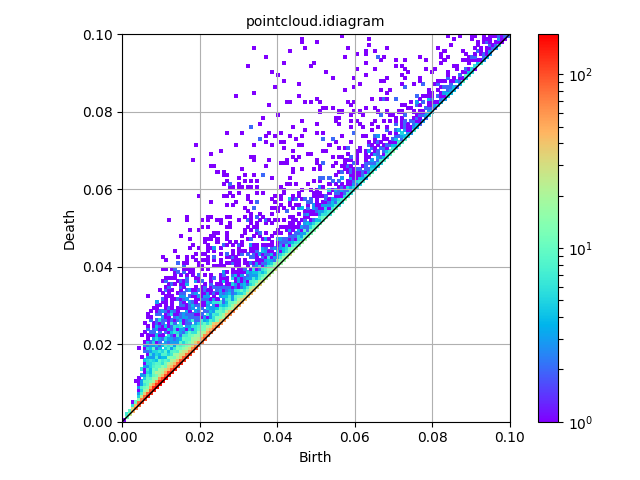

In [7]:
python3 -m homcloud.plot_PD -d 1 -l -x "[0:0.1]" --aspect equal pointcloud.idiagram -o pointcloud-pd1-zoomup.png
display < pointcloud-pd1-zoomup.png

もちろんランダムデータですので意味のあるリング構造があるわけでは
ないのですが、ランダムだとこういうヒストグラムの分布が見えるんだなあ、というのは
知っておくと役に立ちます。


`-X`オプションで解像度を変えることができます。デフォルトでは
128x128でヒストグラムを描きますが、もっと細かく256x256にしてみましょう。
以下のコマンドです。

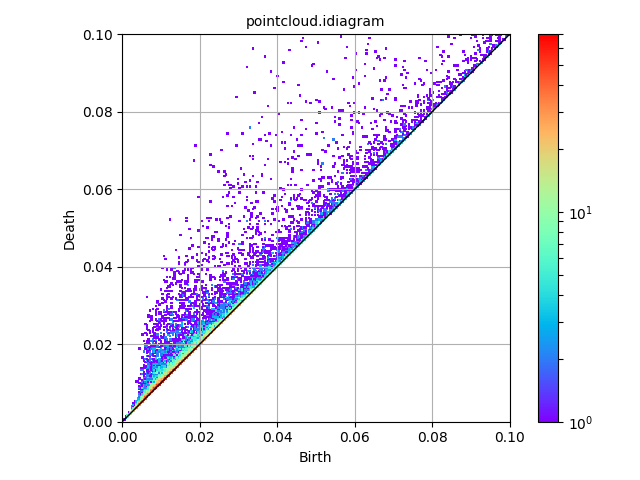

In [8]:
python3 -m homcloud.plot_PD -d 1 -l -x "[0:0.1]" -X 256 --aspect equal pointcloud.idiagram -o pointcloud-pd1-zoomup.png
display < pointcloud-pd1-zoomup.png

ここでは画像を保存してdisplayで表示していましたが、matplotlib (pythonのプロットライブラリ)のインタラクティブインターフェスも
使えることを覚えておくと良いです。`-o ...`による出力ファイル指定を削るとウィンドウが表示されます。
これは右上に x=... y=... というのが表示されていてマウスカーソルがパーシステント図のどの座標の位置にあるのかを
表示してくれたりします。

また、`plot_PD_gui`というモジュールもあり、これはより高度なインタラクティブGUIを提供します。ここで説明したような
プロットのパラメータ変更などがインタラクティブにできます。以下のようにして起動します。

In [9]:
python3 -m homcloud.plot_PD_gui -d 1 pointcloud.idiagram

### テキストデータでの解析
次にパーシステント図をテキストデータとして出力してみましょう。
計算したパーシステント図をさらに統計処理したい、といった場合には
テキスト出力をしてそれを使うのが手軽です。以下のコマンドです。

In [10]:
# データの行数が多いので最後の10行だけを tail で表示する
python3 -m homcloud.dump_diagram -S no -d 1 pointcloud.idiagram | tail 

0.5973638046166524 0.6105533327957627
0.5652198460841742 0.6333196314607087
0.5906213675656147 0.6399900554981125
0.6442572283186025 0.6455006374894877
0.6619166403896363 0.6636272756594286
0.6716352526485909 0.6731624171711277
0.4845143271980769 0.6955406657117916
0.699242025096557 0.6994652025551098
0.7400408653215168 0.7484476418235964
0.7997505082496258 0.800028497810961


すると2列の数値データが出力されます。これは1次のbirth-death pairすべてを列挙していて、
左側の数値がbirth time、右側の数値がdeath timeです。これも
半径の2乗の値が出力されます。`-d 1`の所を`-d 2`にすると2次のbirth death pairが
出力されます。`-S no`は後で説明します

さて、実際に利用するときにはファイルに保存したいでしょうから、`-o`オプションを使って以下のように
やってみましょう。すると pointcloud-pd1.txt に1次のbirth-death pairの情報がテキストで保存されます。


In [11]:
python3 -m homcloud.dump_diagram -S no -d 1 pointcloud.idiagram -o pointcloud-pd1.txt

## 簡単な逆解析について

パーシステント図の個々の点は何らかの意味で元のポイントクラウドのリング構造、空隙構造と
対応しているはずです。しかしそれがどのようなものであるのかを特定するのは実は
そんなに簡単ではないです。このような解析を逆解析と呼びます。HomCloudの
基本的な逆解析のツールであるbirth simplex、death simplexというものを使ってみましょう。birth/death simplexについては
[大林のサーベイ論文](https://doi.org/10.11540/bjsiam.26.4_7)が理解に有用です。
これには`-S`オプションに`yes`を渡すと表示されます。


In [12]:
python3 -m homcloud.dump_diagram -S yes -d 1 pointcloud.idiagram -o pointcloud-pd1.txt
# head で最初の3行だけ表示している
head -n 3 pointcloud-pd1.txt

0.0005037159143533377 0.0005579705552885796 {(0.950995498828,-1.00684503611,0.544429148124),(0.957826751985,-1.02576376749,0.584557432918)} {(0.950995498828,-1.00684503611,0.544429148124),(0.949185316562,-1.0446271794,0.553072016288),(0.957826751985,-1.02576376749,0.584557432918)}
0.0009259080093991961 0.0009586588306071996 {(-0.285082787425,0.181717125153,0.113129839874),(-0.339241447596,0.193383603721,0.0879432393893)} {(-0.285082787425,0.181717125153,0.113129839874),(-0.340910140206,0.168486056354,0.0955091671374),(-0.339241447596,0.193383603721,0.0879432393893)}
0.0010596423596121558 0.001129414564220647 {(0.552627871073,0.604226990892,-0.565845297174),(0.573815276644,0.571818180542,-0.51350666617)} {(0.552627871073,0.604226990892,-0.565845297174),(0.573815276644,0.571818180542,-0.51350666617),(0.571230543389,0.626499609124,-0.547684617092)}


これの最初の2列はbirth time、death timeです。次の2つの列
(よく見ると、`{...} {...}`という形をしています)
がそれぞれbirth simplex、death simplexです。
これの最初の行は(0.0005037159143533377, 0.0005579705552885796)というbirth death pairに
対応するリング構造は、

    (0.950995498828,-1.00684503611,0.544429148124)
    (0.957826751985,-1.02576376749,0.584557432918)

の2つの点を結んだ辺が「現れた」タイミングで生じ、

    (0.950995498828,-1.00684503611,0.544429148124)
    (0.949185316562,-1.0446271794,0.553072016288)
    (0.957826751985,-1.02576376749,0.584557432918)
    
の3つの点を頂点とする3角形が「現れた」タイミングで消えたことを意味します。
上で上げたサーベイ論文が理解の助けになるでしょう。特に実際的なデータ解析では
death simplexのほうが重要です。death simplexの重心あたりがリング構造の
中心になることが多いと考えられるためです。この出力結果は
ファイル`pointcloud-pd1.txt`に保存されていますのででそれをさらに解析することでリングの空間分布を調べる
ようなこともできます。


## 高度な逆解析機能について(Optimal Volume)

次は HomCloud の強力な逆解析ツールである、optimal volumeを使いましょう。
optimal volume について詳しくは、[大林の論文](https://arxiv.org/abs/1712.05103)を参考にしてください。
とりあえずさきほど表示したパーシステント図をもう一度見てみましょう

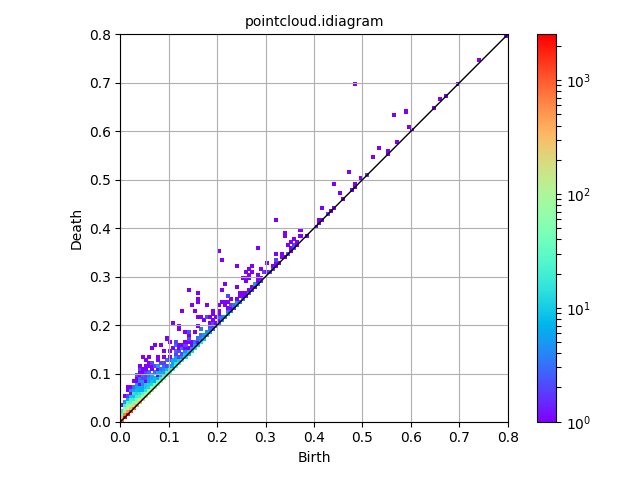

In [13]:
display < pointcloud-pd1-log.png

(0.5, 0.7) 付近に birth-death pair があります。これは
対角線から離れているため、他のリングに比べて重要度が高そうです。これ
の optimal volume を調べましょう。`homcloud.optimal_volume` モジュールを使います。
以下のようなコマンドを実行します。`-d 1`で次数を、`-x 0.5 -y 0.7`でbirth-death pairの位置を
指定します。位置を精密に指定しなくとも、指定した点に一番近いpairを探索してそのpairのoptimal volumeを計算します。
`-P`は内部的にparaviewコマンドを使って可視化をすることを指定します。

In [2]:
python3 -m homcloud.optimal_volume -d 1 -x 0.5 -y 0.7 -P pointcloud.idiagram

するとparaviewのウィンウドウが表示されたはずです。左側のパネルの「Apply」ボタンを押すと表示がされます。
緑のリングが対象となるリングです。それ以外にも様々な情報が表示されています。この情報は
ファイルに保存することもできます。以下のようにします。

In [3]:
python3 -m homcloud.optimal_volume -d 1 -x 0.5 -y 0.7 -j optimal_volume.json pointcloud.idiagram

`optimal_volume.json`にoptimal volumeの情報が保存されています。
これはjson formatになっていて様々な情報が保存されています。
このファイルの中身については現在ドキュメントを準備中です。
とりあえずは大林に質問してください。

optimal volumeとbirth/death simplexの使い分けですが、optimal volumeのほうが情報量が多いので普段はこちらを使えばよいでしょう。
ただ、optimal volumeは計算コストが大きいので、入力データのサイズが大きい場合や多くのbirth-death pairで計算したい場合で
計算時間がどうしようもなくなったら birth/death simplexの利用を検討すると良いでしょう。

以上でこのチュートリアルは終わりです。お疲れさまでした。